# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 622


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
# print(url)
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    # print(city_url)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taiohae
City not found. Skipping...
Processing Record 2 of Set 1 | san luis de la loma
Processing Record 3 of Set 1 | igarka
Processing Record 4 of Set 1 | dzagam
Processing Record 5 of Set 1 | pontianak
Processing Record 6 of Set 1 | jinghong
Processing Record 7 of Set 1 | ankazoabo
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | alofi
Processing Record 10 of Set 1 | kismayo
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | port elizabeth
Processing Record 13 of Set 1 | hamilton
Processing Record 14 of Set 1 | espargos
City not found. Skipping...
Processing Record 15 of Set 1 | college
Processing Record 16 of Set 1 | edinburgh of the seven seas
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | west island
Processing Record 19 of Set 1 | ngaoundere
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          599
Lat           599
Lng           599
Max Temp      599
Humidity      599
Cloudiness    599
Wind Speed    599
Country       599
Date          599
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,san luis de la loma,17.2706,-100.8939,26.24,87,100,2.90,MX,1696213072
1,igarka,67.4667,86.5833,-4.13,77,27,3.43,RU,1696213072
2,dzagam,40.9033,45.8856,16.85,83,100,0.61,AZ,1696213074
3,pontianak,-0.0333,109.3333,26.99,78,20,2.06,ID,1696213074
4,jinghong,21.9910,100.7341,25.46,81,57,0.96,CN,1696213015


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san luis de la loma,17.2706,-100.8939,26.24,87,100,2.90,MX,1696213072
1,igarka,67.4667,86.5833,-4.13,77,27,3.43,RU,1696213072
2,dzagam,40.9033,45.8856,16.85,83,100,0.61,AZ,1696213074
3,pontianak,-0.0333,109.3333,26.99,78,20,2.06,ID,1696213074
4,jinghong,21.9910,100.7341,25.46,81,57,0.96,CN,1696213015


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

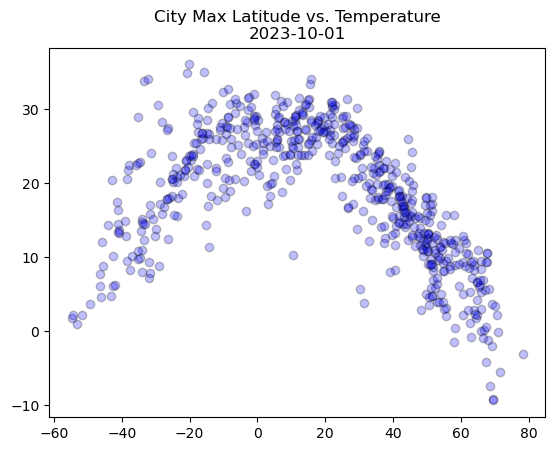

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], color = 'b', alpha = .25, edgecolor = 'black')

# Incorporate the other graph properties
date_now = datetime.datetime.now().strftime("%Y-%m-%d")
plt.title(f"City Max Latitude vs. Temperature\n{date_now}")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

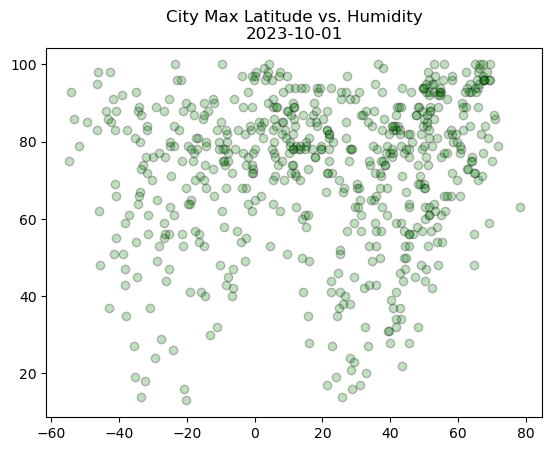

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], color = 'g', alpha = .25, edgecolor = 'black')

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Humidity\n{date_now}")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

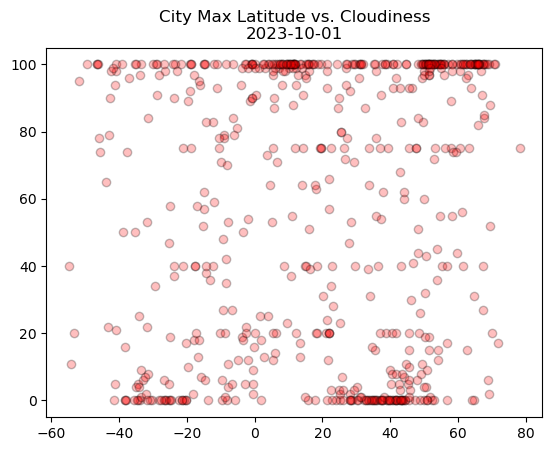

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], color = 'r', alpha = .25, edgecolor = 'black')

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Cloudiness\n{date_now}")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

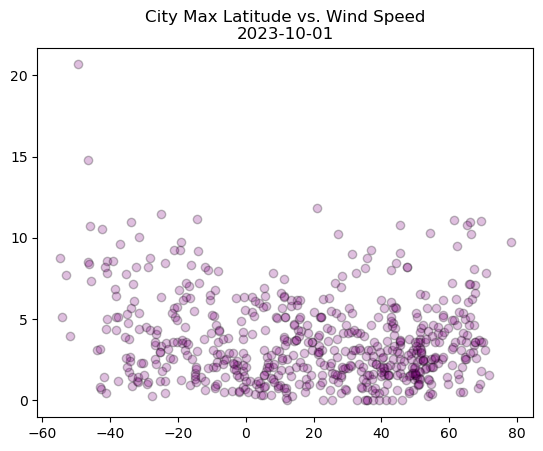

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], color = 'purple', alpha = .25, edgecolor = 'black')

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Wind Speed\n{date_now}")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
x = city_data_df["Lat"]
y = city_data_df["Max Temp"]
slope, int, r, p, std_err = linregress(x, y)
regression = slope * x + int

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san luis de la loma,17.2706,-100.8939,26.24,87,100,2.90,MX,1696213072
1,igarka,67.4667,86.5833,-4.13,77,27,3.43,RU,1696213072
2,dzagam,40.9033,45.8856,16.85,83,100,0.61,AZ,1696213074
4,jinghong,21.9910,100.7341,25.46,81,57,0.96,CN,1696213015
11,hamilton,39.1834,-84.5333,21.89,79,0,0.45,US,1696213076


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,pontianak,-0.0333,109.3333,26.99,78,20,2.06,ID,1696213074
5,ankazoabo,-22.2833,44.5167,18.58,83,0,2.60,MG,1696213075
6,ushuaia,-54.8000,-68.3000,1.81,75,40,8.75,AR,1696213075
7,alofi,-19.0595,-169.9187,23.94,64,100,9.77,NU,1696213075
8,kismayo,-0.3582,42.5454,25.34,77,2,5.55,SO,1696213075


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8543631495933945


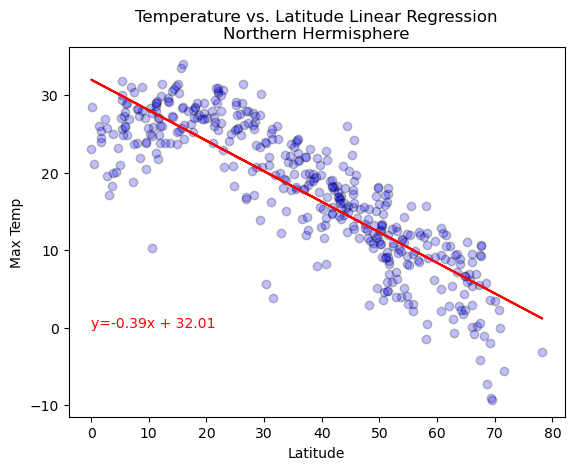

In [18]:
# Linear regression on Northern Hemisphere
hemi = northern_hemi_df
hemi_title = "Northern"
z = "Max Temp"
x = hemi["Lat"]
y = hemi[z]
slope, int, r, p, std_err = linregress(x, y)
regression = slope * x + int
line_eq = "y=" + str(round(slope,2)) + "x + " + str(round(int,2))

plt.scatter(x, y, color = 'b', alpha = .25, edgecolor = 'black')
plt.plot(x, regression, color = "r")
plt.xlabel("Latitude")
plt.ylabel(z)
plt.annotate(line_eq, (0,0), color = "r")
plt.title(f"Temperature vs. Latitude Linear Regression\n{hemi_title} Hermisphere")
print(f"The r-value is {r}")


The r-value is 0.7251407186863328


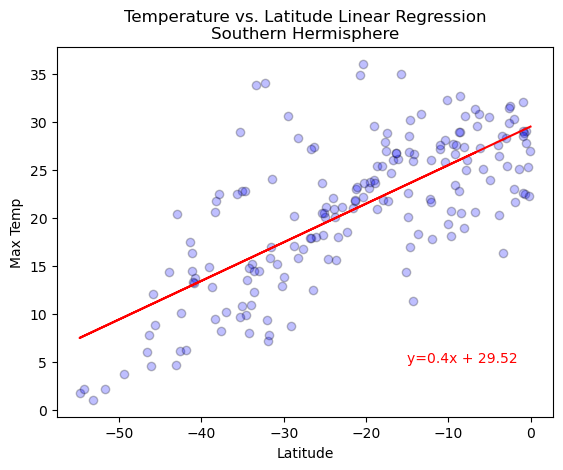

In [19]:
# Linear regression on Southern Hemisphere
hemi = southern_hemi_df
hemi_title = "Southern"
z = "Max Temp"
x = hemi["Lat"]
y = hemi[z]
slope, int, r, p, std_err = linregress(x, y)
regression = slope * x + int
line_eq = "y=" + str(round(slope,2)) + "x + " + str(round(int,2))

plt.scatter(x, y, color = 'b', alpha = .25, edgecolor = 'black')
plt.plot(x, regression, color = "r")
plt.xlabel("Latitude")
plt.ylabel(z)
plt.annotate(line_eq, (-15,5), color = "r")
plt.title(f"Temperature vs. Latitude Linear Regression\n{hemi_title} Hermisphere")
print(f"The r-value is {r}")

**Discussion about the linear relationship:** 
* The Northern Hemisphere is a negative correlation between temperature and latitude.
* The Southern Hemisphere is a positive correlation between temperature and latitude.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.07385429512998941


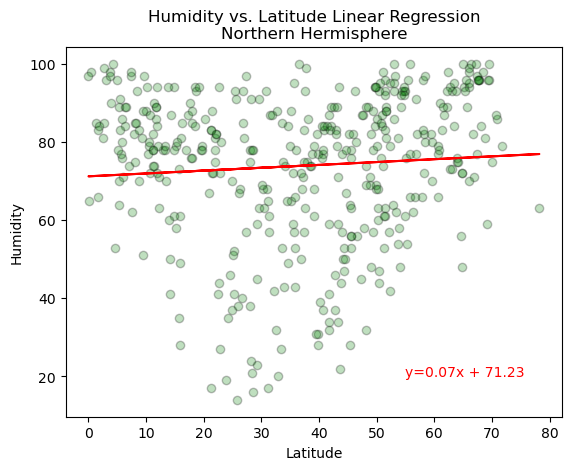

In [20]:
# Northern Hemisphere
hemi = northern_hemi_df
hemi_title = "Northern"
z = "Humidity"
x = hemi["Lat"]
y = hemi[z]
slope, int, r, p, std_err = linregress(x, y)
regression = slope * x + int
line_eq = "y=" + str(round(slope,2)) + "x + " + str(round(int,2))

plt.scatter(x, y, color = 'g', alpha = .25, edgecolor = 'black')
plt.plot(x, regression, color = "r")
plt.xlabel("Latitude")
plt.ylabel(z)
plt.annotate(line_eq, (55,20), color = "r")
plt.title(f"{z} vs. Latitude Linear Regression\n{hemi_title} Hermisphere")
print(f"The r-value is {r}")

The r-value is 0.059240301209420546


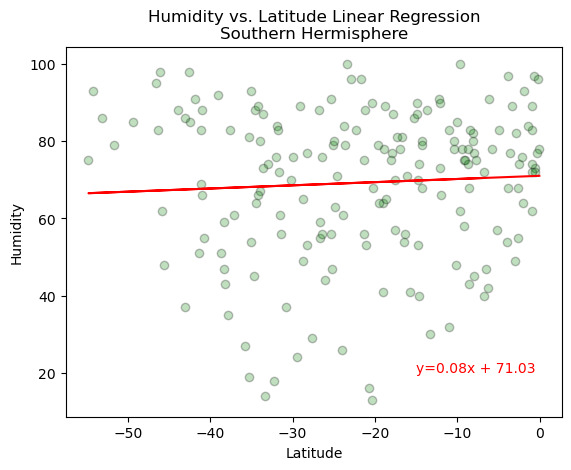

In [21]:
# Southern Hemisphere
hemi = southern_hemi_df
hemi_title = "Southern"
z = "Humidity"
x = hemi["Lat"]
y = hemi[z]
slope, int, r, p, std_err = linregress(x, y)
regression = slope * x + int
line_eq = "y=" + str(round(slope,2)) + "x + " + str(round(int,2))

plt.scatter(x, y, color = 'g', alpha = .25, edgecolor = 'black')
plt.plot(x, regression, color = "r")
plt.xlabel("Latitude")
plt.ylabel(z)
plt.annotate(line_eq, (-15,20), color = "r")
plt.title(f"{z} vs. Latitude Linear Regression\n{hemi_title} Hermisphere")
print(f"The r-value is {r}")

**Discussion about the linear relationship:** 
* The Northern Hemisphere is a slight positive correlation between humidity and latitude.
* The Southern Hemisphere is a slight positive correlation between humidity and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.0013116018696957116


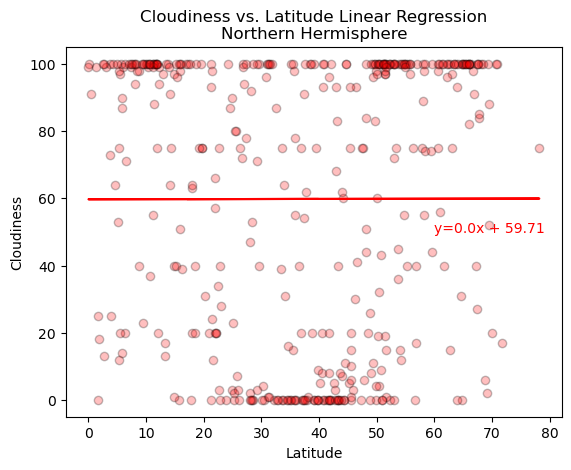

In [22]:
# Northern Hemisphere
hemi = northern_hemi_df
hemi_title = "Northern"
z = "Cloudiness"
x = hemi["Lat"]
y = hemi[z]
slope, int, r, p, std_err = linregress(x, y)
regression = slope * x + int
line_eq = "y=" + str(round(slope,2)) + "x + " + str(round(int,2))

plt.scatter(x, y, color = 'r', alpha = .25, edgecolor = 'black')
plt.plot(x, regression, color = "r")
plt.xlabel("Latitude")
plt.ylabel(z)
plt.annotate(line_eq, (60,50), color = "r")
plt.title(f"{z} vs. Latitude Linear Regression\n{hemi_title} Hermisphere")
print(f"The r-value is {r}")


The r-value is 0.01428321208508583


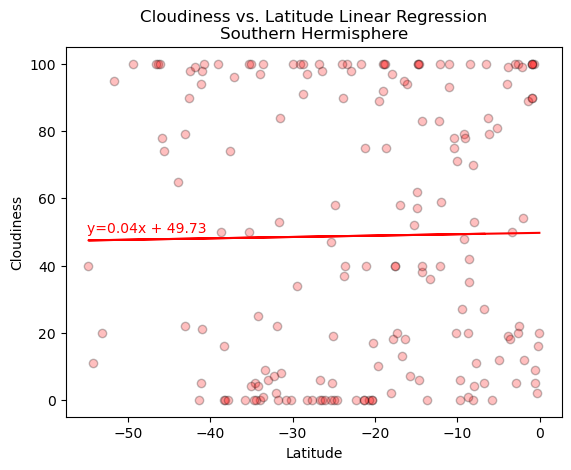

In [23]:
# Southern Hemisphere
hemi = southern_hemi_df
hemi_title = "Southern"
z = "Cloudiness"
x = hemi["Lat"]
y = hemi[z]
slope, int, r, p, std_err = linregress(x, y)
regression = slope * x + int
line_eq = "y=" + str(round(slope,2)) + "x + " + str(round(int,2))

plt.scatter(x, y, color = 'r', alpha = .25, edgecolor = 'black')
plt.plot(x, regression, color = "r")
plt.xlabel("Latitude")
plt.ylabel(z)
plt.annotate(line_eq, (-55,50), color = "r")
plt.title(f"{z} vs. Latitude Linear Regression\n{hemi_title} Hermisphere")
print(f"The r-value is {r}")

**Discussion about the linear relationship:** 
* The Northern Hemisphere has no correlation between cloudiness and latitude with a 0 slope.
* The Southern Hemisphere is a slight positive correlation between cloudiness and latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.13639562544473582


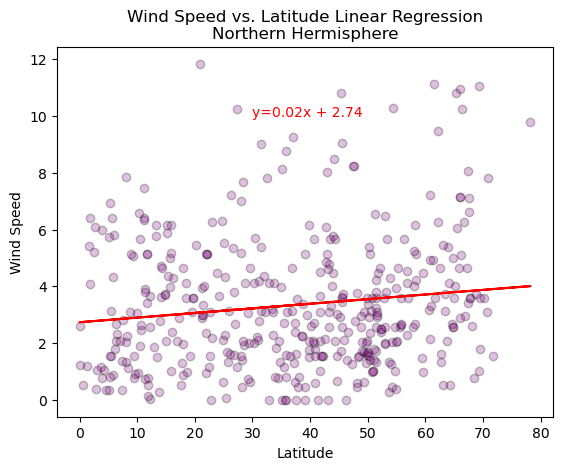

In [24]:
# Northern Hemisphere
hemi = northern_hemi_df
hemi_title = "Northern"
z = "Wind Speed"
x = hemi["Lat"]
y = hemi[z]
slope, int, r, p, std_err = linregress(x, y)
regression = slope * x + int
line_eq = "y=" + str(round(slope,2)) + "x + " + str(round(int,2))

plt.scatter(x, y, color = 'purple', alpha = .25, edgecolor = 'black')
plt.plot(x, regression, color = "r")
plt.xlabel("Latitude")
plt.ylabel(z)
plt.annotate(line_eq, (30,10), color = "r")
plt.title(f"{z} vs. Latitude Linear Regression\n{hemi_title} Hermisphere")
print(f"The r-value is {r}")

The r-value is -0.35326761849849836


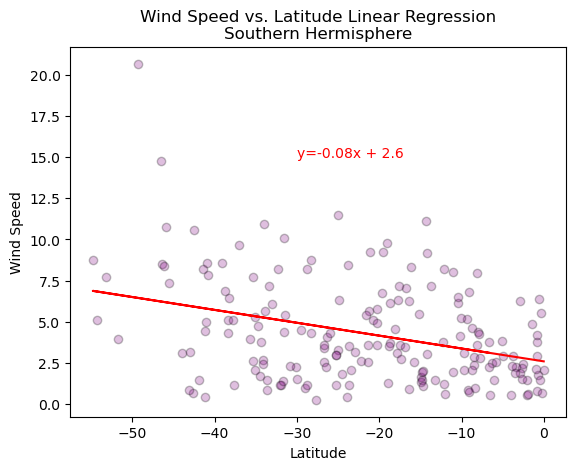

In [25]:
# Southern Hemisphere
hemi = southern_hemi_df
hemi_title = "Southern"
z = "Wind Speed"
x = hemi["Lat"]
y = hemi[z]
slope, int, r, p, std_err = linregress(x, y)
regression = slope * x + int
line_eq = "y=" + str(round(slope,2)) + "x + " + str(round(int,2))

plt.scatter(x, y, color = 'purple', alpha = .25, edgecolor = 'black')
plt.plot(x, regression, color = "r")
plt.xlabel("Latitude")
plt.ylabel(z)
plt.annotate(line_eq, (-30,15), color = "r")
plt.title(f"{z} vs. Latitude Linear Regression\n{hemi_title} Hermisphere")
print(f"The r-value is {r}")

**Discussion about the linear relationship:** 
* The Northern Hemisphere is a slight positive correlation between wind speed and latitude.
* The Southern Hemisphere is a slight negative correlation between wind speed and latitude.